In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

# Sound Pressure
A sound can be described by means of the time-varying sound pressure, $p(t)$. The unit for sound pressure is the pascal, $Pa$. 
<br>
<br>
The following sound pressure thresholds are relevant in psychoacoustics:
- Absolute Threshold: $10^{-5} Pa$
- Pain Threshold: $10^2 Pa$ 

The sound pressure level, $L$, is a logrithmic measure of sound pressure. The relationship between the sound pressure and the sound pressure level is as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB $$
where $p_0$ is the reference value of the sound pressure, standardized to:
$$ p_0 = 20 \mu Pa $$

In [2]:
def sound_pressure_level(p):
    """Calculate the sound pressure level

    Parameters
    ----------
    p : float
        sound pressure (Pa)

    """
    p0 = 20e-6
    return 20 * np.log10(p/p0)

# Sound Intensity
Sound intensity, $I$, is related to sound pressure level as follows:
$$ L = 20 log \left( \frac{p}{p_0} \right) dB = 10 log \left( \frac{I}{I_0} \right) dB$$
where $I_0$ is the reference value of sound intensity, standardized to:
$$ I_0 = 10^{-12} \frac{W}{m^2} $$

In [3]:
def sound_intensity_level(I):
    """Calculate the sound intensity level

    Parameters
    ----------
    I : float
        sound intensity (W/m^2)

    """
    I0 = 10e-12
    return 10 * np.log10(I/I0)

# Sound Density
Sound density is a measure of the sound intensity within a bandwidth of 1 Hz. It is useful measure when dealing with noises. The sound density is sometimes referred to as "noise power density", although this is not quite correct. The sound density level, $l$, is a logrithmic measure of sound density. For white noise, where the sound density level is independent of frequency, the sound desity level can be calculated using the following equation:
$$ l = L - 10 log \left( \frac{\Delta f}{Hz} \right) dB $$
where $\Delta f$ represents the bandwidth of the sound in question measured in Hz.

In [4]:
def sound_density_level_for_white_noise(L, delta_f):
    """Calculate the sound density level for white noise in dB

    Parameters
    ----------
    L : float
        sound pressure level or sound intensity level (dB)
    delta_f : float
        bandwidth (Hz)

    """
    return L - 10 * np.log10(delta_f)

 # Commonly Used Stimuli in Psychoacoustics
 Illustrated below are several time functions and associated frequency spectra of stimuli commonly used in psychoacoustics.
 <br>
 <br>
![](images/audio_stimuli.png)
<br>From "_Psychoacoustics: Facts and models_" (4th ed., pp. 2–2) by Fastl, H., &amp; Zwicker, E. (2010).

## Pure Tone
A pure tone is a continuous sinusoidal oscillation of the sound pressure $p$, as a function of time $t$. The equation for a pure tone is:
$$\begin{aligned}
&p(t) = A \, sin(2 \pi f t \, + \, \theta) \\
& \quad \text{where:} \\
& \quad \quad A \quad \text{: amplitude of the pressure change} \\
& \quad \quad f \quad \text{: tone frequency} \\
& \quad \quad \theta \quad \text{: phase of the sinusoidal oscillation} \\
\end{aligned}$$
In the frequency domain, a pure tone results in a single spectral component at the tone frequency.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Decrease the amplitude of the tone__
> <br> How much do you have to decrease the amplitude by for the audio to sound half as loud?
> <br> <br>  
> 1. __Change the phase of the tone__
> <br> Do you hear a difference in the way the audio sounds for different phases?
> <br> <br>  
> 1. __Increase the tone frequency beyond the Nyquist frequency,__ $\frac{F_s}{2}$
> <br> How does the audio sound as the tone frequency approaches $F_s$?
> <br> <br>  


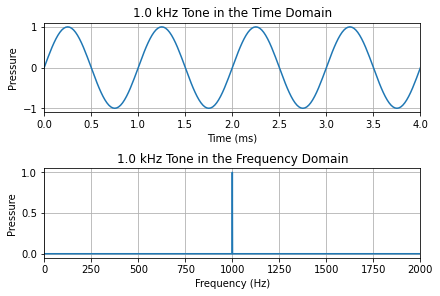

In [5]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: amplitudes greater than 1.0 will cause clipping in the audio output file
A = 1

# Tone frequency
# Note: fequencies greater than Fs/2 will cause aliasing
f_tone = 1e3

# Tone phase
theta_tone = 0

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tone
p = lambda t : A *np.sin(2 * np.pi * f_tone * t + theta_tone)
tone = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone in the time domain
num_periods_to_plot = 4
ax_time.grid()
ax_time.plot(time_ms, tone)
ax_time.set_title('{0} kHz Tone in the Time Domain'.format(f_tone/1000))
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_periods_to_plot / f_tone * 1000))

# Plot tone in the frequency domain
N = len(time)
tone_fft = fft(tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_fft[0:N//2]))
ax_freq.set_title('{0} kHz Tone in the Frequency Domain'.format(f_tone/1000))
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone))

# Generate audio file
wavfile.write('audio/pure_tone.wav', int(Fs), tone.astype(np.float32))

## Beat Freqencies
A beat frequency occurs when two pure tones are summed together. The beat frequency is the difference in frequency between two pure tones. This results in a strong variation of the temporal envelope at the beat frequency. The sound pressure $p$, as a function of time $t$ is described using the following equation:
$$\begin{aligned}
p(t) &= A_1 \, sin \left( 2 \pi f_1 t \, + \, \theta_1 \right) \; + \; A_2 \, sin(2 \pi f_2 t \, + \, \theta_2) \\
& \text{where:} \\
& \quad \quad f_{beat} = \left| f_1 - f_2 \right| \\
\end{aligned}$$
In the frequency domain, beat frequencies appear as two individual spectral components separated by the beat frequency.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Adjust the amplitude of each tone independently__
> <br> - What happens to the temporal envelope when the tone amplitudes are changed? 
> <br> - Does the temporal envelope still cross the x-axis?
> <br> - How does this affect the perceived beat frequency in the audio tone?
> <br> <br>  

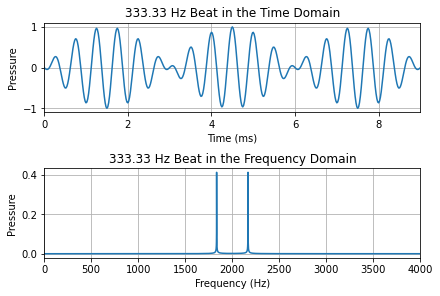

In [6]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: If the sum of the amplitudes is greater than 1.0, there will be clipping in the audio output file
A_1 = 0.5
A_2 = 0.5

# Calculate tone frequencies from the beat frequency
# Note: fequencies greater than Fs/2 will cause aliasing
f_beat = 333.33
f_tone_center = 2e3
f_tone_1 = f_tone_center - f_beat/2
f_tone_2 = f_tone_center + f_beat/2

# Tone phase
theta_tone_1 = 0
theta_tone_2 = np.pi

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tones
tone_1 = lambda t : A_1 *np.sin(2 * np.pi * f_tone_1 * t + theta_tone_1)
tone_2 = lambda t : A_2 *np.sin(2 * np.pi * f_tone_2 * t + theta_tone_2)
p = lambda t : tone_1(t) + tone_2(t)
tone = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone in the time domain
num_beats_to_plot = 3
x_lim_time = num_beats_to_plot / np.abs(f_tone_2 - f_tone_1) * 1000
ax_time.grid()
ax_time.plot(time_ms, tone)
ax_time.set_title('{0:.2f} Hz Beat in the Time Domain'.format(f_beat))
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, x_lim_time))

# Plot tone in the frequency domain
N = len(time)
tone_fft = fft(tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_fft[0:N//2]))
ax_freq.set_title('{0:.2f} Hz Beat in the Frequency Domain'.format(f_beat))
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone_center))

# Generate audio file
wavfile.write('audio/beat_frequency.wav', int(Fs), tone.astype(np.float32))

## Amplitude Modulation
An amplitude modulated tone consists of a carrier tone whose amplitude envelope is varied by a modulation tone. This results in a time domain signal where the modulating tone appears to be "riding on top of" the carrier tone. The following equations describe an AM tone:

$$\begin{aligned}
& \text{Carrier Tone :} \\
& \quad \quad c(t) = A \; sin(2 \pi f_c t) \\
& \\
& \text{Modulation Tone :} \\
& \quad \quad m(t) = A m \; cos(2 \pi f_m t + \theta_m) \\
& \\
& \text{AM tone :} \\
& \quad \quad p(t) = \left[ 1 + \frac{m(t)}{A} \right] \; c(t) \\
& \\
& \quad \text{where:} \\
& \quad \quad A \quad \text{: carrier amplitude} \\
& \quad \quad f_c \quad \text{: carrier frequency} \\
& \quad \quad m \quad \text{: modulation index} \\
& \quad \quad f_m \quad \text{: modulation frequency} \\
& \quad \quad \theta_m \quad \text{: modulation phase} \\
\end{aligned}$$

Using prosthaphaeresis identities, it can be shown that $p(t)$ is the sum of three individual tones:
$$ p(t) = A \; sin(2 \pi f_c t) \; + \; \frac{1}{2} \; A m \; \left[ \; sin(2 \pi \left[ f_c + f_m \right] t \; + \; \theta_m ) \; + \; sin(2 \pi \left[ f_c - f_m \right] t \; - \; \theta_m ) \; \right] $$

These three tones are clearly seen in the frequency domain as two tones of equal amplitude, spaced by the modulation frequency on either side of the carrier tone. The level difference, $\Delta L$, between the carrier tone and the modulation tones is described with the following equation:
$$ \Delta L = 20 \; log \left( \frac{m}{2} \right) \; dB $$

When the modulation index, $m < 1$, the AM tone is considered _undermodulated_. When $m > 1$, the AM tone is considered _overmodulated_.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Adjust the modulation index__
> <br> - What happens to the amplitude envelope when the modulation index is changed? 
> <br> - What happens to the amplitude envelope as the modulation is just barely greater than 1?
> <br> - What does the modulation index have to be set to such that the level difference between the carrier and the modulating tones are equal?
> <br> <br>  
> 1. __Adjust the modulation frequency__
> <br> - As the modulation frequency increases, can you still see the tone "riding on top of" the carrier tone? 
> <br> - How does the tone sound when the modulation frequency is very low (~ 1Hz)? 
> <br> - Do you notice any similarities between beat frequencies and AM tones? 
> <br> <br> 
> 1. __Test the relationship between the carrier amplitude and the modulation index__
> <br> - Can you find a pair of values such that the peak envelope is in the range $\pm$ 1? 
> <br> <br>  

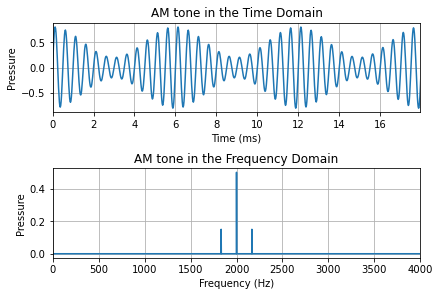

In [7]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Carrier amplitude
A = 0.5

# Carrier frequency
f_c = 2e3

# Modulation index
mod_idx = 0.6

# Amplitude of modulation
M = mod_idx * A

# Modulation frequency
f_m = 167

# Modulation phase
theta_m = 0

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tone
c = lambda t : A * np.sin(2 * np.pi * f_c * t)
m = lambda t : M * np.cos(2 * np.pi * f_m * t + theta_m)
p = lambda t : (1 + m(t)/A) * c(t)
am_tone = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot AM tone in the time domain
num_periods_to_plot = 3
x_lim_time = num_periods_to_plot / f_m * 1000
ax_time.grid()
ax_time.plot(time_ms, am_tone)
ax_time.set_title('AM tone in the Time Domain')
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, x_lim_time))

# Plot AM tone in the frequency domain
N = len(time)
am_tone_fft = fft(am_tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(am_tone_fft[0:N//2]))
ax_freq.set_title('AM tone in the Frequency Domain')
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_c))

# Generate audio file
wavfile.write('audio/am_tone.wav', int(Fs), am_tone.astype(np.float32))

## Tone Pulses
Tone pulses are pure tones that are gated at regular intervals. The pulse frequency, $f_p$, is the frequency at which the pure tone is enabled. The pulse width, $t_{pw}$, is the duration for which the pure tone is enabled. The following equations are used to describe tone pulses:

$$\begin{aligned}
& \text{Pure Tone :} \\
& \quad \quad s(t) = A \; sin(2 \pi f_t t \; + \; \theta_t) \\
& \\
& \text{Tone Gate :} \\
& \quad \quad g(t) = \begin{cases}
      1 \; : \; mod(t, \frac{1}{f_p}) < t_{pw} \\
      0 \; : \; \text{otherwise}
    \end{cases}  
& \\
& \\
& \text{Tone Pulses :} \\
& \quad \quad p(t) = s(t) \cdot g(t) \\
& \\
& \quad \text{where:} \\
& \quad \quad A \quad \text{: tone amplitude} \\
& \quad \quad f_t \quad \text{: tone frequency} \\
& \quad \quad \theta_t \quad \text{: tone phase} \\
& \quad \quad f_p \quad \text{: pulse frequency} \\
& \quad \quad t_{pw} \quad \text{: pulse width} \\
\end{aligned}$$

In the frequency domain, the spacing between the frequency components is set by the pulse frequency, $f_p$.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Adjust the pulse frequency__
> <br> - Does the audio sound _cleaner_ for lower or higher pulse frequencies? 
> <br> - How does the frequency response change as you adjust the pulse frequency?
> <br> <br>  
> 1. __Adjust the pulse width__
> <br> - What happens when the pulse width, $t_{pw}$, is equal to the inverse of the pulse frequency, $\frac{1}{f_p}$?
> <br> - What happens when the pulse width, $t_{pw}$, is less than the inverse of the tone frequency, $\frac{1}{f_t}$?
> <br> <br> 
> 1. __Adjust the tone phase__
> <br> - Do each of the sine wave pulses look the same or are there differences between them?
> <br> - Are there any abrupt changes at the edges of the tone pulse? If so, do you notice a difference in the audio? What about in the frequency response? 
> <br> <br> 
> 1. __Compare the pulse width and pulse frequency__
> <br> - Is there some relationship between the pulse width and pulse frequency that ensures that all the pulses look identical in the time domain?
> <br> <br>  

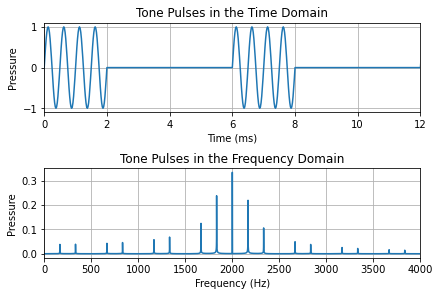

In [8]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: amplitudes greater than 1.0 will cause clipping in the audio output file
A = 1

# Tone frequency
# Note: fequencies greater than Fs/2 will cause aliasing
f_tone = 2000

# Tone phase
theta_tone = 0

# Pulse frequency
f_pulse = 166.666

# Pulse width
t_pulse_width = 2e-3

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate tone pulses
s = lambda t : A *np.sin(2 * np.pi * f_tone * t + theta_tone)
g = lambda t : t % (1 / f_pulse) < t_pulse_width 
p = lambda t : s(t) * g(t)
tone_pulse = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot tone pulses in the time domain
num_pulses_to_plot = 2
ax_time.grid()
ax_time.plot(time_ms, tone_pulse)
ax_time.set_title('Tone Pulses in the Time Domain')
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_pulses_to_plot / f_pulse * 1000))

# Plot tone pulses in the frequency domain
N = len(time)
tone_pulse_fft = fft(tone_pulse)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(tone_pulse_fft[0:N//2]))
ax_freq.set_title('Tone Pulses in the Frequency Domain')
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2*f_tone))

# Generate audio file
wavfile.write('audio/tone_pulses.wav', int(Fs), tone_pulse.astype(np.float32))

## DC Pulses
DC pulses consists of a DC volatge that is gated at regular intervals. The pulse frequency, $f_p$, is the frequency at which the DC voltage is enabled. The pulse width, $t_{pw}$, is the duration for which the DC voltage is enabled. The following equations are used to describe DC pulses:

$$\begin{aligned}
& \text{DC Pulses :} \\
& \quad \quad p(t) = \begin{cases}
      A \; : \; mod(t, \frac{1}{f_p}) < t_{pw} \\
      0 \; : \; \text{otherwise}
    \end{cases}  
& \quad \text{where:} \\
& \quad \quad A \quad \text{: DC voltage} \\
& \quad \quad f_p \quad \text{: pulse frequency} \\
& \quad \quad t_{pw} \quad \text{: pulse width} \\
\end{aligned}$$

In the frequency domain, the spacing between the frequency components is set by the pulse frequency, $f_p$, and the strength of each harmonic is a function of the pulse width, $t_{pw}$.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Compare the pulse width and pulse frequency__
> <br> - What do you notice about the strength of each harmonic when you set the pulse width, $t_{pw}$ to $\frac{1}{2}$ the pulse period, $\frac{1}{f_p}$? 
> <br> - What do you notice about the strength of each harmonic when you set the pulse width, $t_{pw}$ to $\frac{1}{4}$ the pulse period, $\frac{1}{f_p}$? How about $\frac{1}{8}$ the pulse period?
> <br> <br>  

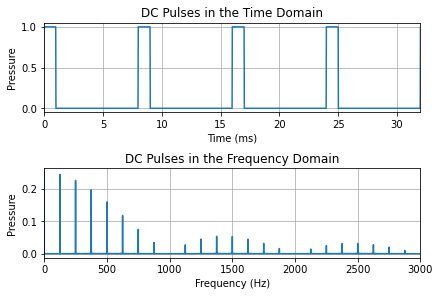

In [9]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: amplitudes greater than 1.0 will cause clipping in the audio output file
A = 1

# Pulse frequency
f_pulse = 125

# Pulse width
t_pulse_width = 1e-3

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate DC pulses
p = lambda t : A * (t % (1 / f_pulse) < t_pulse_width)
dc_pulse = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot DC pulses in the time domain
num_pulses_to_plot = 4
ax_time.grid()
ax_time.plot(time_ms, dc_pulse)
ax_time.set_title('DC Pulses in the Time Domain')
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_pulses_to_plot / f_pulse * 1000))

# Plot DC pulses in the frequency domain
num_harmonics_to_plot = 24
N = len(time)
dc_pulse_fft = fft(dc_pulse)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(dc_pulse_fft[0:N//2]))
ax_freq.set_title('DC Pulses in the Frequency Domain')
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, num_harmonics_to_plot * f_pulse))

# Generate audio file
wavfile.write('audio/dc_pulses.wav', int(Fs), dc_pulse.astype(np.float32))

## FM Tone

A frequency modulated (FM) tone consists of a carrier tone, to which the instantaneous frequency is varied with time. A simple case of frequency modulation is where the carrier signal is varied sinusoidally with time. The following equation is used to describe frequency modulation of a sinusoidal signal:

$$\begin{aligned}
& \text{Modulating Tone :} \\
& \quad \quad m(t) = \frac{f_{\Delta}}{f_m} \; sin(2 \pi f_m t) \\
& \\
& \text{FM Tone :} \\
& \quad \quad p(t) = A \; cos \left( 2 \pi f_c t \; + \; m(t) \right) \\
& \\
& \quad \text{where:} \\
& \quad \quad f_{\Delta} \quad \text{: frequency deviation} \\
& \quad \quad f_m \quad \text{: modulation frequency} \\
& \quad \quad A \quad \text{: carrier amplitude} \\
& \quad \quad f_c \quad \text{: carrier frequency} \\
\end{aligned}$$

The frequency deviation, $f_{\Delta}$, is the amount that the FM tone frequency will deviate from the carrier frequency, $f_c$, in either direction, and the modulation frequency, $f_m$, is the rate at which this deviation will occur. In the frequncy domain, the spectrum of the FM tone is nearly symmetric about the carrier, so long as there is minimal aliasing from the FM sidebands.
<br>
<br>
> ### Additional Learning Excercises...
> 1. __Experiment with different modulation frequencies__
> <br> - Lower the modulation frequency to 2 Hz and listen to the audio. Does this make it more clear as to how FM modulation works? 
> <br> <br> 
> 1. __Play with the frequency deviation and the carrier frequency__
> <br> - What happens when the frequency deviation is greater than the carrier frequency? Is the frequency response still symmetric about the carrier frequency? 
> <br> <br> 

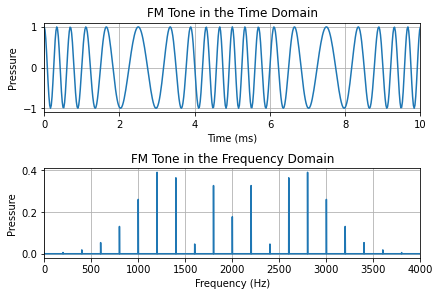

In [37]:
%matplotlib inline

# Sample rate
Fs = 48e3

# Sample period
Ts = 1/Fs

# Amplitude
# Note: amplitudes greater than 1.0 will cause clipping in the audio output file
A = 1

# Carrier frequency
f_carrier = 2e3

# Frequency deviation
f_delta = 1e3

# Modulation frequency
f_mod = 200

# Time
stop_time = 1
time = np.arange(0, stop_time, Ts)
time_ms = time * 1000

# Generate FM tone
m = lambda t : f_delta / f_mod * np.sin(2 * np.pi * f_mod * t)
p = lambda t : A * np.cos(2 * np.pi * f_carrier * t + m(t))
fm_tone = p(time)

# Create figure
fig, (ax_time, ax_freq) = plt.subplots(2, 1, constrained_layout=True)

# Plot FM tone in the time domain
num_periods_to_plot = 2
ax_time.grid()
ax_time.plot(time_ms, fm_tone)
ax_time.set_title('FM Tone in the Time Domain')
ax_time.set_xlabel('Time (ms)')
ax_time.set_ylabel('Pressure')
ax_time.set_xlim((0, num_periods_to_plot / f_mod * 1000))

# Plot FM tone in the frequency domain
N = len(time)
fm_tone_fft = fft(fm_tone)
freq = fftfreq(N, Ts)[:N//2]
ax_freq.grid()
ax_freq.plot(freq, 2.0/N * np.abs(fm_tone_fft[0:N//2]))
ax_freq.set_title('FM Tone in the Frequency Domain')
ax_freq.set_xlabel('Frequency (Hz)')
ax_freq.set_ylabel('Pressure')
ax_freq.set_xlim((0, 2 * f_carrier))

# Generate audio file
wavfile.write('audio/fm_tone.wav', int(Fs), fm_tone.astype(np.float32))